### **Bibliotecas**

In [1]:
import pandas as pd
from scipy.stats import  f_oneway, pearsonr, linregress
import matplotlib.pyplot as plt
import seaborn as sns

### **``Estatística e Machine Learning - QUESTÃO 3``**

Determine:
- Hipótese nula ($H_0$)
- Hipótese alternativa ($H_a$)

Do seguinte cenário:

- Uma empresa afirma que o tempo médio de produção dos seus produtos é de menos de 4 dias.

\
Você, conta com uma amostra dessas entregas para validar estadísticamente essa afirmação.

<br>
Como quero testar se o tempo médio de produção realmente é menor que 4 dias:

$
\begin{cases}
H_0: \mu \geq 4 & \text{(Tempo médio de produção} \geq \text{4 dias)} \\
H_a: \mu < 4 & \text{(Tempo médio de produção < 4 dias)}
\end{cases}
$

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 4``**

Suponha que numa escola, 4 grupos diferentes de estudantes fazem o mesmo teste de matemática com as seguintes pontuações:
- **Grupo A:** {80, 85, 88, 90, 92, 75, 78}

- **Grupo B:** {75, 78, 82, 85, 87, 93, 99}

- **Grupo C:** {20, 78, 82, 18, 30, 93, 15}

- **Grupo D:** {40, 55, 65, 75, 85, 95, 100}

\
Elabore um teste de hipótese para determinar se existe uma diferença estatisticamente significativa na distribuição das pontuações dos grupos

$
\begin{cases}
H_0: \mu_A = \mu_B = \mu_C = \mu_D & \text{(Não há diferença significativa entre as médias dos grupos)} \\
H_1: i,j \in \{A,B,C,D\}\ |\ \mu_i \neq \mu_j & \text{(Pelo menos dois grupos têm médias significativamente diferentes)}
\end{cases}
$

O teste ANOVA foi projetado para comparar as médias de três ou mais grupos independentes, sendo ideal para determinar se há diferenças significativas entre eles de forma simultânea.

Uma de suas principais vantagens é o controle do erro tipo I (rejeitar incorretamente a hipótese nula), mantendo a taxa de erro em α (geralmente 0,05) para a comparação global entre todos os grupos.

Esse valor representa a probabilidade máxima aceitável de cometer um erro tipo I.

In [2]:
dados = {
    'A': [80, 85, 88, 90, 92, 75, 78],
    'B': [75, 78, 82, 85, 87, 93, 99],
    'C': [20, 78, 82, 18, 30, 93, 15],
    'D': [40, 55, 65, 75, 85, 95, 100]
}

# Criando o DataFrame
dataset = pd.DataFrame(dados)

# Perform ANOVA using DataFrame columns
f_statistic, p_value = f_oneway(dataset['A'], dataset['B'], dataset['C'], dataset['D'])

print(f"Média A: {dataset['A'].mean():.2f}\tDesvio A: {dataset['A'].std(ddof=0):.2f}")
print(f"Média B: {dataset['B'].mean():.2f}\tDesvio B: {dataset['B'].std(ddof=0):.2f}")
print(f"Média C: {dataset['C'].mean():.2f}\tDesvio C: {dataset['C'].std(ddof=0):.2f}")
print(f"Média D: {dataset['D'].mean():.2f}\tDesvio D: {dataset['D'].std(ddof=0):.2f}")

# Results
print(f"\nF-statistic: {f_statistic:.4f}")
print(f"P-value = {p_value:.4f}")

Média A: 84.00	Desvio A: 5.98
Média B: 85.57	Desvio B: 7.74
Média C: 48.00	Desvio C: 32.02
Média D: 73.57	Desvio D: 20.13

F-statistic: 4.7395
P-value = 0.0098


No caso em questão:
 - $P\text-value = 0.0098 < 0.05$
 
Dessa forma, rejeitamos $H_0$ e podemos afirmar que ``há uma diferença estatisticamente significante`` nas distribuição das pontuações dos grupos.

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 5``**

Qual é a relação do  "Número de aparições Zendaya em filmes por ano" e "Número de pessoas afogadas em piscinas no Brasil ao ano".

,Ano,Aparicoes_Zendaya,Afogamentos_Brasil
0,2015,4,107
1,2016,7,146
2,2017,16,178
3,2018,21,199
4,2019,26,221
5,2020,2,114
6,2021,6,133
7,2022,12,159
8,2023,16,183
9,2024,32,215


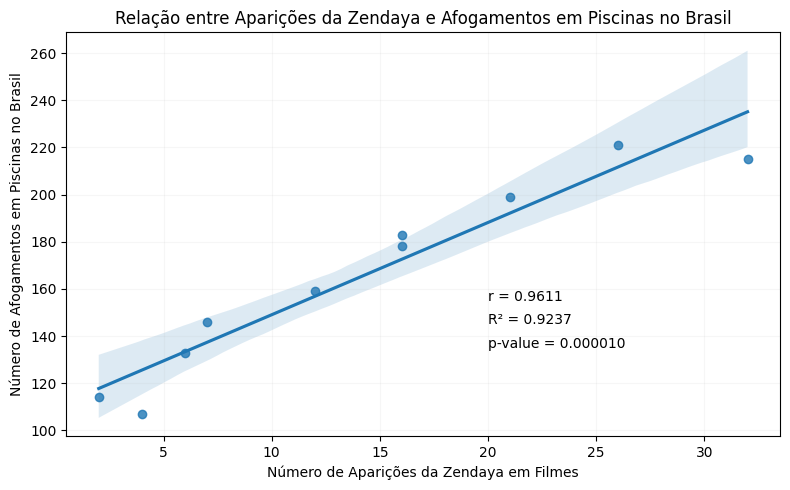

Coeficiente de correlação (r): 0.9611
R²: 0.9237
Valor-p: 0.000010


In [3]:
data = {
    'Ano': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Aparicoes_Zendaya': [4, 7, 16, 21, 26, 2, 6, 12, 16, 32],
    'Afogamentos_Brasil': [107, 146, 178, 199, 221, 114, 133, 159, 183, 215]
}

dataset_df = pd.DataFrame(data)
display(dataset_df)

plt.figure(figsize=(8, 5))
sns.regplot(x='Aparicoes_Zendaya', y='Afogamentos_Brasil', data=dataset_df)
plt.title('Relação entre Aparições da Zendaya e Afogamentos em Piscinas no Brasil')
plt.xlabel('Número de Aparições da Zendaya em Filmes')
plt.ylabel('Número de Afogamentos em Piscinas no Brasil')
plt.grid(True, alpha=0.1)

# Adicionar a equação da linha de regressão e o R²
slope, intercept, r_value, p_value, std_err = linregress(dataset_df['Aparicoes_Zendaya'], dataset_df['Afogamentos_Brasil'])
plt.text(20, 155, f'r = {r_value:.4f}', fontsize=10)
plt.text(20, 145, f'R² = {r_value**2:.4f}', fontsize=10)
plt.text(20, 135, f'p-value = {p_value:.6f}', fontsize=10)

plt.tight_layout()
plt.show()

# Calcular o teste de hipótese para verificar se a correlação é estatisticamente significativa
r, p_value = pearsonr(dataset_df['Aparicoes_Zendaya'], dataset_df['Afogamentos_Brasil'])


print(f"Coeficiente de correlação (r): {r:.4f}")
print(f"R²: {r*r:.4f}")
print(f"Valor-p: {p_value:.6f}")


Com isso temos que:

- **r = 0.9611** indica uma correlaçâo muito forte.

- **R^2=0.9237** indica que 92,37% das variações no número de afogamentos são estaticamente explicadas pelo número de aparições

- **p-value = 0.000010 ($<$ 0.05)** indica que a correlação é estatisticamente significante.


Contudo, apesar de as duas variáveis apresentaram uma forte correlação, o número de aparições ``não é um bom preditor`` do número de pessoas afogadas no Brasil

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 5``**
#### **``BONUS 1``**

Que acontece quando se usa Covariância para identificar a relação entre as duas variáveis?

In [4]:
covariance = dataset_df['Aparicoes_Zendaya'].cov(dataset_df['Afogamentos_Brasil'])
print(f"Covariância: {covariance:.4f}")

Covariância: 384.8889


Quando usamos a covariância para analisar a relação entre as aparições da Zendaya em filmes e os afogamentos em piscinas no Brasil, enfrentamos várias limitações importantes:

- **``Ausência de escala padronizada:``**\
A covariância não possui limites definidos, o valor 384,89 por si só não nos diz se a relação é forte ou fraca.

- **``Dependência da escala das variáveis:``**\
    Se mudássemos as unidades de medida o valor da covariância mudaria drasticamente, mesmo que a relação fundamental permanecesse idêntica.

- **``Impossibilidade de comparação:``**\
Não podemos comparar diretamente a covariância desta relação com outras relações entre variáveis diferentes.

- **``Interpretação limitada:``**\
Embora o valor positivo da covariância indique que as variáveis se movem na mesma direção, não conseguimos quantificar a força desta relação.

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 5``**
#### **``BONUS 2``**

Identifique e mencione alguns possíveis confounders:

- **``Tendência temporal:``**\
Ambas as variáveis podem estar simplesmente aumentando ao longo do tempo por razões independentes.

- **``Temperatura/Sazonalidade:``**\
Anos mais quentes podem levar a maior uso de piscinas e coincidir com períodos de maior lançamento de filmes de verão.

- **``Crescimento populacional:``**\
O aumento da população brasileira pode levar a mais afogamentos e o crescimento da indústria leva a mais filmes.

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 6``**

Qual é a diferença entre amostragem estratificada e amostragem randômica ou aleatória?

- **``Amostragem Aleatória:``**\
Na amostragem aleatória, cada elemento da população tem a mesma probabilidade de ser selecionado para a amostra.\
O processo é completamente randômico, sem considerar características específicas dos elementos.

- **``Amostragem Estratificada:``**\
Na amostragem estratificada a população é dividida em subgrupos com base em características relevantes (Peso, idade, estado, país, etc.)\
A amostragem seleciona os elementos da amostra em número proporcional ao tamanho de cada um dos estratos.

<br>

Qual você selecionaria se no seu estudo tem suspeita de confounding mas sua amostra é muito grande?

- **``Amostragem Estratificada``**
    - Garante uma melhor representação dos grupos

    - Reduz o erro amostral

    - Reduz a variância

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 7``**

Se você treina um modelo de Machine Learning (ou estadístico), como você identificaria se seu modelo tem uma alta variância (overfitting) ou um alto viés (bias, ou underfitting).

Caso seu modelo apresenta alta variância, como você resolveria esse problema?

<br>

Para identificar se um modelo de Machine Learning apresenta alta variância (overfitting) ou alto viés (underfitting), é necessário analisar seu comportamento nos conjuntos de treinamento e teste.

### **Identificação de Problemas no Modelo**

| Problema | Sintomas | Métricas de Identificação | Comportamento da Curva de Aprendizado |
|----------|----------|---------------------------|---------------------------------------|
| **Alto Viés (Underfitting)** | • Modelo muito simples<br>• Incapaz de capturar padrões nos dados | • Alto erro no conjunto de treino<br>• Alto erro no conjunto de validação<br>• Erro de treino e validação similares e altos | • Erro de treino e validação convergem rapidamente para um valor alto<br>• Ambas as curvas são planas e próximas |
| **Alta Variância (Overfitting)** | • Modelo muito complexo<br>• Captura ruído nos dados de treino | • Baixo erro no conjunto de treino<br>• Alto erro no conjunto de validação<br>• Grande diferença entre erro de treino e validação | • Erro de treino muito baixo<br>• Grande gap entre erro de treino e validação<br>• Curva de validação não estabiliza com mais dados |


### **Soluções para Alta Variância (Overfitting)**


| Técnica | Descrição | Implementação |
|---------|-----------|---------------|
| **Regularização** | Adiciona penalidade à complexidade do modelo | • L1 (Lasso): `alpha * Σ\|w_i\|`<br>• L2 (Ridge): `alpha * Σw_i²`<br>• ElasticNet: combinação de L1 e L2 |
| **Redução de Complexidade** | Simplifica o modelo | • Reduzir número de camadas/neurônios em redes neurais<br>• Diminuir profundidade de árvores<br>• Reduzir número de features |
| **Mais Dados** | Aumenta o tamanho do conjunto de treino | • Coleta de mais dados<br>• Data augmentation<br>• Técnicas de oversampling |
| **Dropout** | Desativa aleatoriamente neurônios durante o treino | • Em redes neurais: `model.add(Dropout(0.5))` |
| **Early Stopping** | Interrompe o treino quando performance no conjunto de validação começa a piorar | • Monitorar erro de validação e parar quando começar a aumentar |
| **Ensemble Methods** | Combina múltiplos modelos | • Bagging (Random Forest)<br>• Boosting (XGBoost, AdaBoost)<br>• Stacking |
| **Cross-Validation** | Avalia o modelo em diferentes subconjuntos dos dados | • K-Fold Cross-Validation<br>• Leave-One-Out Cross-Validation |

<br>

A escolha da técnica mais adequada dependerá do tipo específico de modelo e do contexto do problema sendo resolvido.

A combinação de várias dessas abordagens frequentemente produz os melhores resultados para combater o overfitting.

<br>

---

### **``Estatística e Machine Learning - QUESTÃO 8``**

#### **Por que o teorema central do limite é importante no campo da inferência estatística?**

O Teorema Central do Limite (TCL) garante que, à medida que o tamanho da amostra aumenta, **a distribuição da média amostral se aproxima de uma distribuição normal**, independentemente da forma da distribuição da população.

Isso permite que possamos fazer estimativas e testes de hipóteses sobre uma população com base em amostras, mesmo quando a distribuição original não é normal.

Além disso, o **TCL justifica o uso de intervalos de confiança e de muitos testes estatísticos que assumem normalidade**, tornando-o essencial para análises estatísticas confiáveis e previsíveis.


<br>

---

### **``Estatística e Machine Learning - QUESTÃO 9``**

#### **Considere o seguinte modelo de regressão:**

**``salario = 1200 + 500 * idade  + 600 * tem_faculdade + 50 * tem_linkedin``**

**a.** 	Interprete o efeito da Idade na variável salário:

- A cada ano adicional de idade, o salário aumenta em média R$ 500.

**b.** Que acontece com as pessoas que não tem faculdade?

- Ganham em média R$ 600 a menos que pessoas com faculdade (salario = 1200 + 500 * idade + 50 * tem_linkedin)

**c.** Considere agora que o desvio padrão do coeficiente da variável "Têm Linkedin" é de 80, por tanto o seu p-valor ≃ 0.92 (como visto na equação abaixo). O que isso implica para o modelo em questão? Essa variável é relevante?


| **Salário**     | **1200**  | **500 * idade** | **600 * tem_faculdade** | **50 * tem_linkedin**  |
|:----------------|:---------:|:---------------:|:-----------------------:|:----------------------:|
| **std**         | (200)     | (125)           | (150)                   | (50)                   |
| **t-score**     | 6.11      | 5.32            | 5.06                    | 0.466                  |
| **p-value**     | 0.0       | 0.023           | 0.032                   | 0.921                  |

<br>

Assumindo que a hipótese nula $(H_0)$ é que o coeficiente dá variável tem_linkedin = 0:

- Reijatamos a hipótese pois:
    
    - $p\text-value = 0.921 > 0.05$

- Um t-score = 0.466 indica que o coeficiente não é significativamente diferente de zero

Portanto, a variável tem_linkedin **não é relevante para o modelo e pode ser removida**
